# Projet 1

BREGEON Antoine

BARBE Victor

GAUCHER Pierre Louis


In [1]:
# Add ProBT's path
import sys
sys.path.append('../lib')

# Import ProBT
from probt import *

from auxFunctions import *

import math

import matplotlib.pyplot as plt



*******************************************************************
*                    ProBT Library   V3.1.99-20160616             *
*                                                                 *
*               Copyright 2001-2008: CNRS & Probayes              *
*               Copyright 2009-2020: Probayes                     *
*                      All rights reserved                        *
*******************************************************************



In [2]:
#Declaration of variable
#type of variable int from 0 to 10
var_type= plIntegerType(0,10) 

water_inputI0=plVariable("I0",var_type)#I0
water_inputI1=plVariable("I1",var_type)#I1
water_output=plVariable("O",var_type)#O
sensor=plVariable("S",var_type)#S
controller=plVariable("C",var_type)#C
external_factor=plVariable("H",var_type)#H
system=plVariable("F",var_type)# F

# save the value for futur user input 
result = plValues(water_inputI0^water_inputI1^water_output^controller^external_factor^system)  


In [3]:
# Fonction of the problem giving the output 0 with all variable in parametter
def f1(water_output,traitement_info):
    #calcul of O*
    O_max=(traitement_info[0]+traitement_info[1]+10)/3
    O_max=round(O_max)
    #calcul of alpha
    alpha=(traitement_info[0]+traitement_info[1]+traitement_info[2]-traitement_info[3]+traitement_info[4])/3
    alpha=round(alpha)
    #determine final value of O depending of alpha value
    if alpha>=0 and alpha<=O_max:
        output=alpha
    elif alpha>=O_max:
        output=2*O_max-alpha
    else : 
        output=0
    water_output[0]=output
    

## Creation of the model

In [4]:
#conjonction of variable
traitement_info = plVariablesConjunction(water_inputI0^water_inputI1^system^external_factor^controller)
#The function for the general result
result_function = plPythonExternalFunction(water_output, traitement_info, f1)
#Probability of each result case. General application
P_result = plCndDeterministic(water_output, traitement_info, result_function)

print(P_result)

P(O|I0 I1 F H C) = if (O) = f_1(I0 I1 F H C) then 1 else 0.0 


In [5]:
# Creation of uniform law for each variable, for the situations where we have no information about it
P_F = plUniform(system)
P_H = plUniform(external_factor)
P_C = plUniform(controller)
P_IO = plUniform(water_inputI0)
P_I1 = plUniform(water_inputI1)

In [6]:
#Create Join distribution with all the variable of the problem
jd = plJointDistribution(traitement_info^water_output,P_F*P_H*P_C*P_IO*P_I1*P_result)
jd

P(I0 I1 F H C O) =  { P(F)P(H)P(C)P(I0)P(I1)P(O|I0 I1 F H C) } 

## 1st question P(O | I0=i0  I1=i1)

In [7]:
prob = plCndDistribution()
question = plDistribution()
compiled_question = plDistribution()
# question 1 to the model 
jd.ask(prob, water_output,water_inputI0^water_inputI1)

Give me IO: 4
Give me I1: 6
P(O | IO = 4 , I1=6)
P(O) = 
O		Probability
0		0.00300525920360631
1		0.0232907588279489
2		0.0638617580766341
3		0.124718256949662
4		0.186326070623591
5		0.226897069872276
6		0.247182569496619
7		0.124718256949662
8		0
9		0
10		0



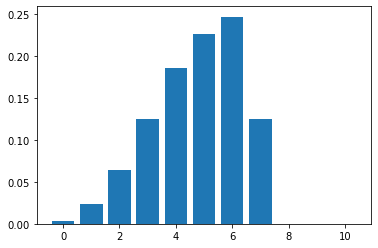

In [8]:
# ask to the user input of IO and I1 
I0 = int(input("Give me IO: "))
I1 = int(input("Give me I1: "))
#give value I0 and I1 
result[water_inputI0] = I0
result[water_inputI1] = I1

#get P(O | I0=i0 I1=i1)
prob.instantiate(question,result)
question.compile(compiled_question)
print(f'P(O | IO = {I0} , I1={I1})')

print(compiled_question.compile())
# plot distribution graph
plotDistribution(compiled_question)

## Question 2 : P(H F | O=o I1=i1)

In [9]:
prob = plCndDistribution()
question = plDistribution()
compiled_question = plDistribution()
# question 2 to the model 
jd.ask(prob, system^external_factor, water_output^water_inputI1)

In [10]:
# ask O et I1 to the user
O = int(input("Give me 0: "))
I1 = int(input("Give me I1: "))
# give the fixed value to O et I1
result[water_output] = O
result[water_inputI1] = I1

#GET  P(H F | O=o I1=i1)
prob.instantiate(question,result)
question.compile(compiled_question)
print(f'P(HF | O = {O}) , I1={I1}')
# print distribution tab values
compiled_question.compile()
""" Test display graph
a = compiled_question.as_dataframe()
print(type(a))
a=a.assign(H=H)
H=[]
F=[]
for i in range (0,11):
    for j in range(0,11):
        H.append(j)
for i in range (0,11):
    for j in range(0,11):
        F.append(i)
a=a.assign(F=F)
a=a.assign(H=H)

print(a)

fig=plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(a['H'],a['F'],a,50,cmap='binary')
ax.set_xlabel('H')
ax.set_xlabel('F')
ax.set_xlabel('P')
ax.view_init(60,35)
fig"""

Give me 0: 4
Give me I1: 6
P(HF | O = 4) , I1=6


" Test display graph\na = compiled_question.as_dataframe()\nprint(type(a))\na=a.assign(H=H)\nH=[]\nF=[]\nfor i in range (0,11):\n    for j in range(0,11):\n        H.append(j)\nfor i in range (0,11):\n    for j in range(0,11):\n        F.append(i)\na=a.assign(F=F)\na=a.assign(H=H)\n\nprint(a)\n\nfig=plt.figure()\nax = plt.axes(projection='3d')\nax.contour3D(a['H'],a['F'],a,50,cmap='binary')\nax.set_xlabel('H')\nax.set_xlabel('F')\nax.set_xlabel('P')\nax.view_init(60,35)\nfig"

## Question 3: P( I0 | O=o I1=i1)

In [11]:
prob = plCndDistribution()
question = plDistribution()
compiled_question = plDistribution()
# question 3 to the model 
jd.ask(prob, water_inputI0,water_output^water_inputI1)

give the values of O: 7
Give me I1: 5
P(I0 | O = 0) , I1=5
P(I0) = 
I0		Probability
0		0
1		0
2		0
3		0
4		0
5		0.0984578884934757
6		0.116251482799526
7		0.13226571767497
8		0.195136417556346
9		0.218268090154211
10		0.239620403321471



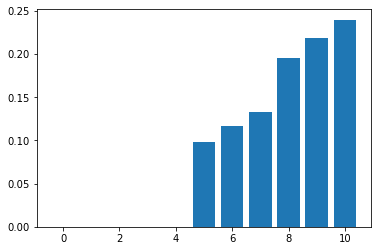

In [12]:
# ask O et I1 to the user
O= int(input("give the values of O: "))
I1=int(input("Give me I1: "))
# give the fixed value to O et I1
result[water_output] = O
result[water_inputI1] = I1

#get P( I0 | O=o I1=i1)
prob.instantiate(question,result)
question.compile(compiled_question)
print(f'P(I0 | O = {0}) , I1={I1}')
# print distribution tab values
print(compiled_question.compile())
# plot distribution graph
plotDistribution(compiled_question)

## Question 4 P(O | C= c I0=i0 I1=i0)

In [13]:
prob = plCndDistribution()
question = plDistribution()
compiled_question = plDistribution()
# question 4 to the model 
jd.ask(prob, water_output,water_inputI0^water_inputI1^controller)

give the values of I0: 4
Give me the values of the controler: 7
P(I0 | I0 = 4) , I1=4, C=7
P(O) = 
O		Probability
0		0
1		0.0247933884297521
2		0.0991735537190083
3		0.173553719008264
4		0.256198347107438
5		0.297520661157025
6		0.148760330578512
7		0
8		0
9		0
10		0



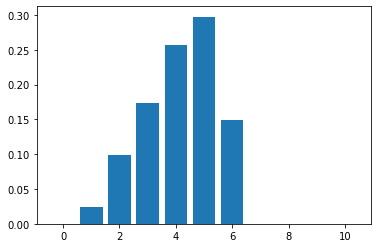

In [14]:
# ask O and C to the user
I0= int(input("give the values of I0: "))
C= int(input("Give me the values of the controler: "))

# give the value IO I1 and C 
result[water_inputI0] = I0
result[water_inputI1] = I0
result[controller] = I1

#Get P(O2 | C=c I0=i0 I1=i0)
prob.instantiate(question,result)
question.compile(compiled_question)
print(f'P(I0 | I0 = {I0}) , I1={I0}, C={C}')
# print distribution tab values
print(compiled_question.compile())
# plot distribution graph
plotDistribution(compiled_question)